![alt text](img/remarkable.png)

---

# IP core based on ML integrated with PYNQ framework

In [1]:
from pynq import Overlay
from pynq import MMIO
import comblock as cbc

import numpy as np
import matplotlib.pyplot as plt

## Load Overlay

In [2]:
# Load the overlay (bitstream) onto the FPGA. 

ol = Overlay("design_1_wrapper.xsa")

The information from the **comblock_0** block is read to verify everything that is obtained. Since the object is mapped to AXI Lite, it is noted that the AXI Full address is omitted.

In [3]:
## Overlay information

#ol.ip_dict

## ComBlock information

ComBlock for PYNQ: https://github.com/Mballina42/PynQ_ComBlock

For convenience, the *comblock.py* Python script is established which contains useful constants for interacting with the ComBlock.

In [4]:
#ol.ip_dict['comblock_0']

In [5]:
# The object is created based on the comblock_0 IP

cb = ol.comblock_0

## Data preparation 

In [6]:
signal_1 = [ 
    
    #0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,243,242,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,254,254,229,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,254,254,254,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,254,254,254,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,254,254,254,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,254,254,186,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,173,254,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,254,254,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,254,254,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,254,254,247,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,255,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,254,254,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,255,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,249,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,237,254,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,254,254,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,254,254,206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,254,254,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,254,254,227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,254,254,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,254,254,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,254,254,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,235,254,251,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,249,254,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,254,254,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,254,254,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,254,245,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,242,254,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,254,254,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,254,254,209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,254,254,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,254,254,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,254,254,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    
   ]

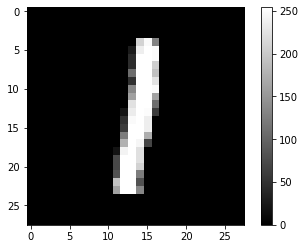

In [7]:
imageArray = np.array(signal_1)

image_2d = imageArray.reshape((28, 28))

# Display as an image
plt.imshow(image_2d, cmap='gray', interpolation='nearest')
plt.colorbar()  # Optional: Show color scale
plt.show()


In [14]:
signal_2 = [ 

    #0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,153,238,217,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,253,217,176,211,246,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,194,253,109,5,0,13,217,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,254,78,3,0,0,0,195,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,253,108,3,0,0,0,7,210,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,244,136,3,0,0,0,0,68,254,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,204,13,0,0,0,0,11,218,254,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,252,65,0,0,0,0,0,17,229,218,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,197,254,26,0,0,0,0,7,190,250,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,254,40,0,0,0,50,206,254,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,251,231,135,126,199,247,254,254,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,152,202,163,133,134,255,218,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,254,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,255,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,254,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,215,229,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,254,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,255,91,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,255,241,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,212,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,141,255,255,255,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,255,255,226,198,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,255,255,114,0,0,29,226,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,226,255,255,86,0,0,0,0,86,255,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,255,255,86,0,0,0,0,57,226,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,141,0,0,0,0,86,255,255,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,255,255,86,0,0,0,0,141,255,255,255,226,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,170,0,0,0,57,226,255,255,255,255,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,255,86,0,0,86,226,255,255,255,255,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,226,255,29,57,226,255,255,198,255,255,255,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,255,255,255,255,255,170,114,255,255,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,255,255,170,29,198,255,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,29,0,0,86,255,255,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198,255,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,255,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,255,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,226,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    
]

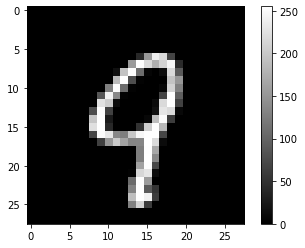

In [15]:
imageArray = np.array(signal_2)

image_2d = imageArray.reshape((28, 28))

# Display as an image
plt.imshow(image_2d, cmap='gray', interpolation='nearest')
plt.colorbar()  # Optional: Show color scale
plt.show()

## Interacting with ComBlock 

### Signal 1

#### Write FIFO - Send image to the FPGA

In [10]:
cb.write(cbc.OREG1, 1)

# Send data to the ComBlock's FIFO
data_size = 28*28
for i in range(data_size):
       cb.write(cbc.OFIFO_VALUE, signal_1[i])


#### Read registers - Read inference result from the FPGA

In [11]:
# Read IREG1 to obtain the result of the inferece process 
cb.read(cbc.IREG1)

1

### Signal 2

#### Write FIFO - Send image to the FPGA

In [16]:
cb.write(cbc.OREG1, 1)

# Send data to the ComBlock's FIFO
data_size = 28*28
for i in range(data_size):
       cb.write(cbc.OFIFO_VALUE, signal_2[i])

#### Read registers - Read inference result from the FPGA

In [17]:
cb.read(cbc.IREG1)

9

---
#### Valencia, Spain - 2025

Romina Soledad Molina, Ph.D. - MLab/STI ICTP, Trieste, Italy